# Introduction to neural network classification with TensorFlow


In [1]:
import tensorflow as tf

###Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 Examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise =0.3,
                    random_state = 42)

In [3]:
# check out features
x

array([[ 0.59171471,  0.43674853],
       [-0.45745002,  0.36160118],
       [-1.01069349,  0.83042101],
       ...,
       [-0.01985814, -1.02765007],
       [ 0.54269168, -1.11429774],
       [ 0.24539316,  1.01154823]])

In [4]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":x[: , 0], "X1":x[: , 1] , "label": y})
circles

,X0,X1,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

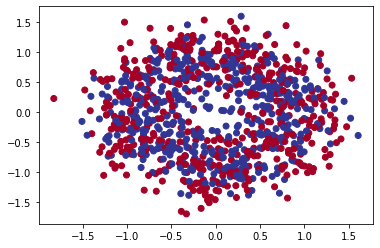

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [8]:
# check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're workin
len(x), len(y)

(1000, 1000)

In [10]:
# view the first example of features and labels
x[0], y[0]

(array([0.59171471, 0.43674853]), 1)

### Steps in modelling

In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.4716 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4920


In [12]:
# Let's try and improve our model by training for longer

model_1.fit(x,y, epochs = 200, verbose =0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934647560119629, 0.5]

In [13]:
# Add an extra layer

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(x,y, epochs = 100, verbose = 0)

# 4. Evaluate the model
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933214068412781, 0.5]

## Improving the model

In [14]:
# Let's increase the numbers of neurons and the activation function

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with more neurons and activation function
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(x,y, epochs = 100, verbose =0)

# 4. Evaluate the model
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.5090


[0.7028663754463196, 0.5090000033378601]

To visualize our model's predictions, let's create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, features (x) and labels(y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between Zones(where each unique class falls

In [15]:
import numpy as np

In [16]:
import numpy as np
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

In [17]:
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.9242827440194399, 1.704576244837228, -1.795442626863992, 1.701149358125095)